<a href="https://colab.research.google.com/github/Lakshya-13-04/Artificial_Neural_Network/blob/main/Flight_Price_Prediction_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Flight_Booking.csv to Flight_Booking.csv


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras_tuner as kt
import pickle
import os

## Exporatory Data Analysis

In [ ]:
df = pd.read_csv('Flight_Booking.csv')

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## **Building a simple Neural Network**

In [ ]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [ ]:
df['class'] = df['class'].map({'Economy' : 0 , 'Business' : 1})

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955


In [ ]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [ ]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [ ]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [ ]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [ ]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [ ]:
df['stops'] = df['stops'].map({'zero' : 0 , 'one' : 1, 'two_or_more' : 2})

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [ ]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

#### Till now we have check the unique values of all columns so that we can identify whther we can use pd.factorize or label encoding for converting categorical variables into numerical
- since we can see there is no data that is in order like (small, medium, large) or (low, medium, high) therefore we are using **'pd.factorize'** method

- secondly we have also done **maping** of some columns

### we will be now performing something called as **Recursive Feature Elimination**
- this will alow us to select the best feature that require for my model to predict the price

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
df1 = pd.read_csv('Flight_Booking.csv')

Selected features by RFE: ['airline', 'source_city', 'destination_city', 'class', 'duration', 'days_left']


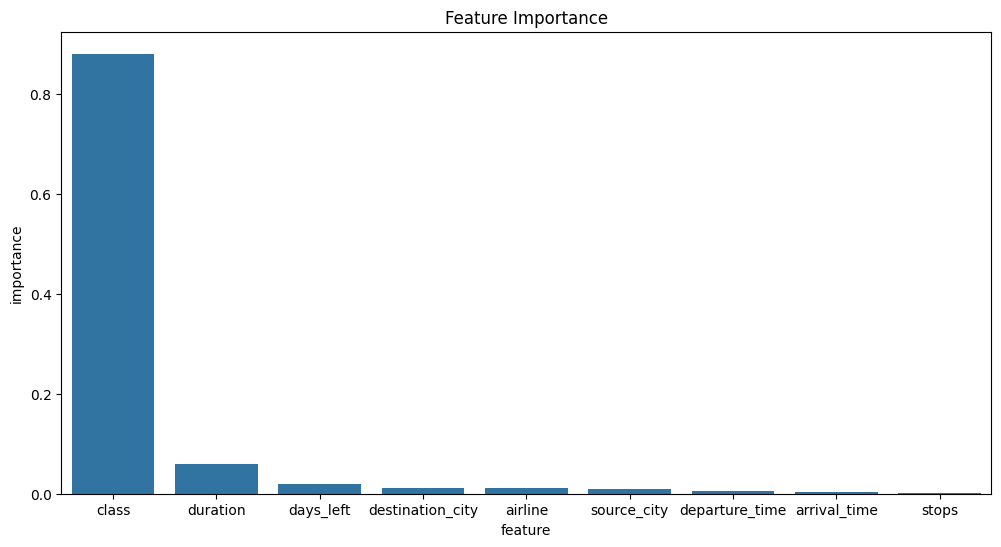

In [ ]:
numerical_features = ['airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left']

for col in numerical_features:
  if df[col].dtype == 'object':
    df[col] = pd.factorize(df[col])[0]


numerical_features = [f for f in numerical_features if f in df.columns] # will check if anything gets changed in my original data or not

# Validation step
X = df[numerical_features]
y = df['price']

# implementing RFE
rf =  RandomForestRegressor(n_estimators = 120,  random_state = 42)

rfe = RFE(estimator = rf, n_features_to_select= 6)

rfe.fit(X,y)

selected_features = [feature for feature, selected in zip(numerical_features, rfe.support_) if selected]

print(f'Selected features by RFE: {selected_features}')

rf.fit(X,y)

importances = pd.DataFrame({'feature': numerical_features,
                            'importance' : rf.feature_importances_})
importances = importances.sort_values('importance', ascending = False)

# Ploting feature vs importance
plt.figure(figsize = (12,6))
sns.barplot(x = 'feature', y = 'importance', data = importances)
plt.title('Feature Importance')
plt.show()

In [ ]:
df[selected_features]

,airline,flight,departure_time,destination_city,class,duration,days_left
0,0,0,0,0,0,2.17,1
1,0,1,1,0,0,2.33,1
2,1,2,1,0,0,2.17,1
3,2,3,2,0,0,2.25,1
4,2,4,2,0,0,2.33,1
...,...,...,...,...,...,...,...
300148,2,1457,2,3,1,10.08,49
300149,2,1461,3,3,1,10.42,49
300150,2,1437,1,3,1,13.83,49
300151,2,1462,1,3,1,10.00,49


### to see which categorical value is aasign to which column we will perform following operation

In [ ]:
categorical_columns =  [
    'airline','source_city', 'departure_time',
    'stops', 'arrival_time', 'destination_city', 'class'
]

In [ ]:
for col in categorical_columns:
  codes, uniques = pd.factorize(df1[col])
  print(f"\nMapping for column: '{col}'")
  for code, category in enumerate(uniques):
    print(f'{code} --> {category}')


Mapping for column: 'airline'
0 --> SpiceJet
1 --> AirAsia
2 --> Vistara
3 --> GO_FIRST
4 --> Indigo
5 --> Air_India

Mapping for column: 'source_city'
0 --> Delhi
1 --> Mumbai
2 --> Bangalore
3 --> Kolkata
4 --> Hyderabad
5 --> Chennai

Mapping for column: 'departure_time'
0 --> Evening
1 --> Early_Morning
2 --> Morning
3 --> Afternoon
4 --> Night
5 --> Late_Night

Mapping for column: 'stops'
0 --> zero
1 --> one
2 --> two_or_more

Mapping for column: 'arrival_time'
0 --> Night
1 --> Morning
2 --> Early_Morning
3 --> Afternoon
4 --> Evening
5 --> Late_Night

Mapping for column: 'destination_city'
0 --> Mumbai
1 --> Bangalore
2 --> Kolkata
3 --> Hyderabad
4 --> Chennai
5 --> Delhi

Mapping for column: 'class'
0 --> Economy
1 --> Business


#### Initaiating Model Building

In [ ]:
X = df[selected_features]
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state= 23)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
with open('scaler.pkl', 'wb') as f:
  pickle.dump(scaler,f)

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# Hyper paramter tuning of Neural Network
def create_model(hp =None):
  if hp:
    model = models.Sequential()

    # first layer
    model.add(layers.Dense(
        units = hp.Choice('units_1', values = [16,32,64]),
        activation = 'relu',
        input_shape = (X_train_scaled.shape[1],),
    ))

    #optional Second Layer
    if hp.Boolean('Second_layer'):
      model.add(layers.Dense(
          units = hp.Choice('units_2', values = [16,32]),
          activation = 'relu'
      ))

    # output layer
    model.add(layers.Dense(1, activation = 'linear'))

    #compiling the model
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['r2_core'])

  else:
    model = models.Sequential([
        layers.Dense(64, activation = 'relu', input_shape = (X_train_scaled.shape[1],)),
        layers.Dense(32, activation = 'relu'),
        layers.Dense(16, activation = 'relu'),
        layers.Dense(8, activation = 'relu'),
        layers.Dense(1, activation = 'linear')
    ])

    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['r2_score'])

  return model

initial_model = create_model()
initial_model.summary()

history = initial_model.fit(
    X_train_scaled,
    y_train, epochs = 60,
    batch_size = 300,
    validation_split = 0.20,
    verbose =1
    )


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
641/641 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 773528640.0000 - r2_score: -0.5029 - val_loss: 55412720.0000 - val_r2_score: 0.8925
Epoch 2/60
641/641 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 53274564.0000 - r2_score: 0.8970 - val_loss: 49854184.0000 - val_r2_score: 0.9033
Epoch 3/60
641/641 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 49975840.0000 - r2_score: 0.9032 - val_loss: 48079552.0000 - val_r2_score: 0.9067
Epoch 4/60
641/641 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 48379088.0000 - r2_score: 0.9063 - val_loss: 46621568.0000 - val_r2_score: 0.9096
Epoch 5/60
641/641 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 46412380.0000 - r2_score: 0.9104 - val_loss: 44191720.0000 - val_r2_score: 0.9143
Epoch 6/60
641/641 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 43458480.0000 - r2_score: 0.9159 - val_loss: 40586268.0000 - val_r2_score: 0.9213
Epoch 7/60
641/641 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 39550648.0000 - r2_score: 0.9234 - val_loss: 36995236.0000 - val_r2_score: 0.9282
Epoc

In [ ]:
# testing our model on  test data
loss , accuracy = initial_model.evaluate(X_test_scaled, y_test)
print(f'Test Loss : {loss}')
print(f'Test accuracy(r2_score) : {accuracy}')

1876/1876 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 30603870.0000 - r2_score: 0.9402
Test Loss : 29683442.0
Test accuracy(r2_score) : 0.9416369795799255


In [ ]:
# Visualizing our data to check our model perform well or not

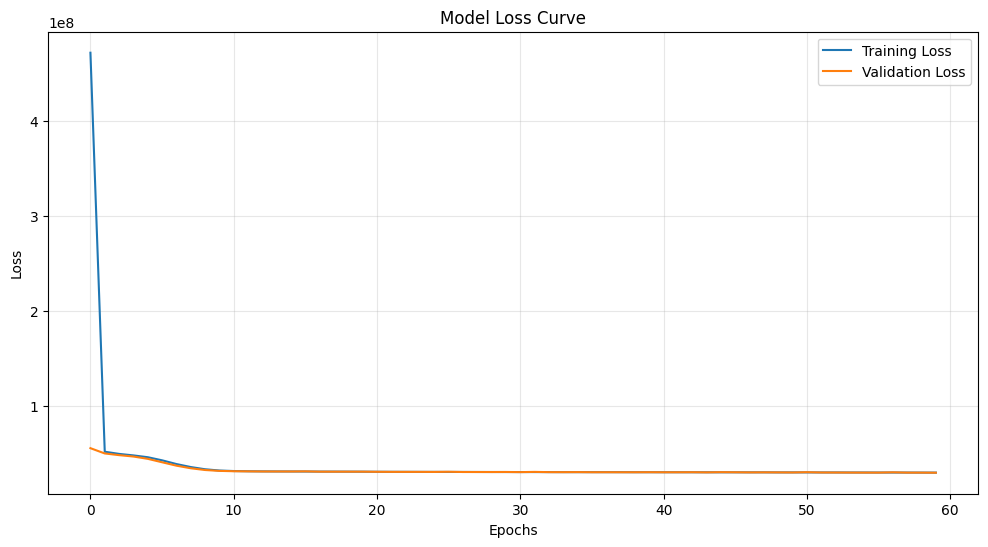

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Curve')
plt.grid(alpha = 0.30)
plt.legend()
plt.show()

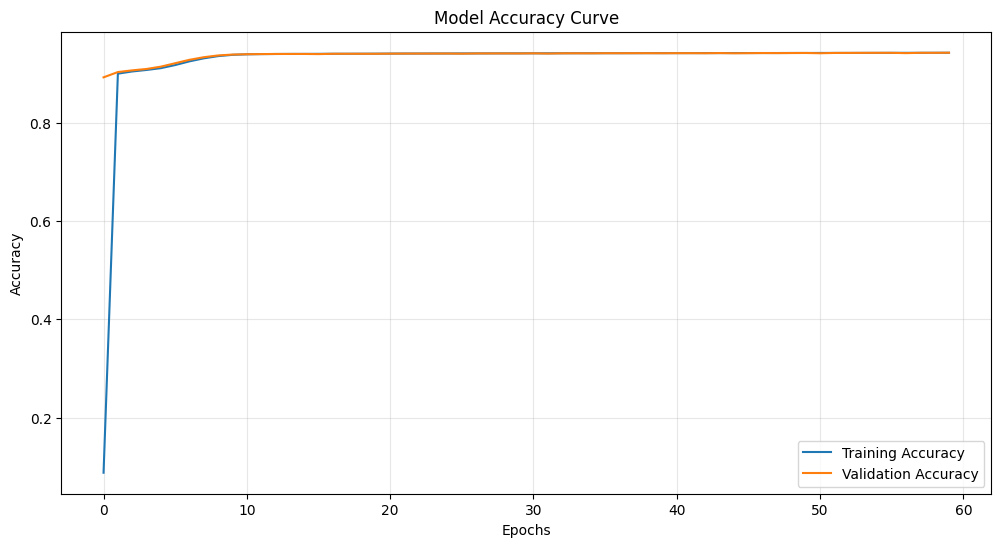

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(history.history['r2_score'], label = 'Training Accuracy')
plt.plot(history.history['val_r2_score'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curve')
plt.grid(alpha = 0.30)
plt.legend()
plt.show()

### From graph we can see that our training acuuraccy and testing accuracy is constant after runing some epochs , so we does not require to perform hyper parameter tuning

In [ ]:
initial_model.save('inital_model.keras')

In [ ]:
with open ('selected_features.pkl', 'wb') as file:
  pickle.dump(selected_features, file)

In [ ]:
# Consume the keras model
def load_model_component():
  # load the keras format
  model = tf.keras.models.load_model('inital_model.keras')

  #read binary
  with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

  # load selected features
  with open('selected_features.pkl', 'rb') as file:
    selected_features = pickle.load(file)

  return model, scaler, selected_features

In [ ]:
def predict_flight_price(*inputs):
    # Load model, scaler, and expected features
    model, scaler, selected_features = load_model_component()

    # Convert inputs into a DataFrame (1 row, column names = selected_features)
    input_df = pd.DataFrame([inputs], columns=selected_features)

    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_df)[0][0]

    # Return result in JSON/dict format
    return {"predicted_price (INR)": round(prediction, 2)}



### Creating Gradio Interface

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import gradio as gr

In [ ]:
selected_features

['airline',
 'source_city',
 'destination_city',
 'class',
 'duration',
 'days_left']

In [ ]:
def create_gradio_interface():
  model, scaler, selected_features = load_model_component()

  input = []

  for feature in selected_features:
    if feature == 'airline':
      input.append(gr.Radio(
          label = feature, choices = [0,1,2,3,4,5], info = '0 = SpiceJet , 1 = AirAsia, 2 = Vistara, 3 = GO_FIRST, 4 = Indigo , 5 = Air_India'
      ))

    if feature == 'source_city':
      input.append(gr.Radio(
          label = feature , choices = [0,1,2,3,4,5], info = '0 = Delhi, 1 = Mumbai, 2 = Bangalore, 3 = Kolkata, 4 = Hyderabad, 5 = Chennai'
      ))

    if feature == 'destination_city':
      input.append(gr.Radio(
          label = feature, choices = [0,1,2,3,4,5], info = '0 = Mumbai, 1 = Bangalore, 2 = Kolkata, 3 = Hyderabad, 4 = Chennai, 5 = Delhi'
      ))

    if feature == 'class':
      input.append(gr.Radio(
          label = feature, choices = [0,1], info = '0 = Economy, 1 = Buisness'
      ))

    if feature == 'duration':
      input.append(gr.Slider(label= feature, value = 0.83, minimum= 0.83, maximum= 50, step = 0.17
      ))

    if feature == 'days_left':
      input.append(gr.Slider(
          label = feature, value = 1, minimum= 1, maximum= 50, step = 1
      ))

  Interface = gr.Interface(
      fn = predict_flight_price,
      inputs = input,
      outputs = gr.JSON(label = 'Flight Prediction'),
      description = 'predict your flight price by selecting the following details',
      examples = [[1, 2,4,0, 6.5,3]] if len(selected_features) == 6 else None
  )

  return Interface



In [ ]:
Interface= create_gradio_interface()

In [ ]:
Interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://baf7cc3d641b0baf80.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
